<a href="https://colab.research.google.com/github/Mustafa-Dara-Ozevin/ML_Algorithms_on_Kaggle_Datasets/blob/master/House_Sales_in_Kings_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import copy
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.shape)
print(df.isnull().sum())
print(df.isna().sum())


(21613, 21)
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
df = df.drop(labels=['zipcode','date','id'],axis=1)
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,47.5941,-122.299,1020,1357


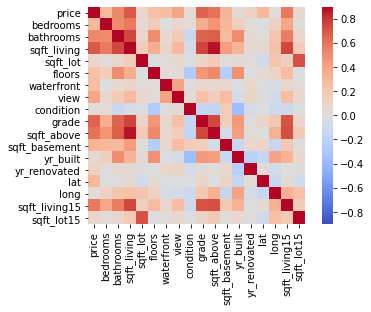

In [5]:
corrmat = df.corr()
sns.heatmap(corrmat, vmin=-.9, vmax=.9, square=True, cmap = 'coolwarm')

In [6]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
scaler = MinMaxScaler()
scaler.fit(df.drop(labels='price',axis=1))
df_transformed = scaler.transform(df.drop(labels='price',axis=1))
X = pd.DataFrame(df_transformed)
y = df['price']
X.columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.741354,0.393688,0.241094,0.007871


In [8]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)
feature_importances = gbr.feature_importances_

X_opt = X.copy()
removed_columns = pd.DataFrame()
models = []
r2_opt = []

for i in range(0,15):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_opt.pop(X_opt.columns[least_important]))
    gbr.fit(X_opt, y)
    feature_importances = gbr.feature_importances_
    accuracies = cross_val_score(gbr,
                                 X = X_opt,
                                 y = y, cv = 5,
                                 scoring = 'r2')
    r2_opt = np.append(r2_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2_opt})
feature_selection.head(18)

,Features,r2 Score
0,"bedrooms, bathrooms, sqft_living, sqft_lot, wa...",0.859025
1,"bathrooms, sqft_living, sqft_lot, waterfront, ...",0.859972
2,"bathrooms, sqft_living, sqft_lot, waterfront, ...",0.860736
3,"bathrooms, sqft_living, sqft_lot, waterfront, ...",0.861314
4,"bathrooms, sqft_living, sqft_lot, waterfront, ...",0.860177
5,"bathrooms, sqft_living, waterfront, view, grad...",0.859678
6,"bathrooms, sqft_living, waterfront, view, grad...",0.857315
7,"sqft_living, waterfront, view, grade, sqft_abo...",0.859741
8,"sqft_living, waterfront, view, grade, yr_built...",0.857087
9,"sqft_living, waterfront, grade, yr_built, lat,...",0.854102


In [9]:
for j in range(10):
  print(feature_selection.iloc[j,0])

bedrooms, bathrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15
bathrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15
bathrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15
bathrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, yr_built, lat, long, sqft_living15, sqft_lot15
bathrooms, sqft_living, sqft_lot, waterfront, view, grade, sqft_above, yr_built, lat, long, sqft_living15, sqft_lot15
bathrooms, sqft_living, waterfront, view, grade, sqft_above, yr_built, lat, long, sqft_living15, sqft_lot15
bathrooms, sqft_living, waterfront, view, grade, sqft_above, yr_built, lat, long, sqft_living15
sqft_living, waterfront, view, grade, sqft_above, yr_built, lat, long, sqft_liv

In [10]:
X_best=X[['sqft_living', 'waterfront', 'grade', 'yr_built', 'lat', 'long', 'sqft_living15']]
X_best.tail()

,sqft_living,waterfront,grade,yr_built,lat,long,sqft_living15
21608,0.093585,0.0,0.583333,0.947826,0.874055,0.143688,0.194631
21609,0.152453,0.0,0.583333,0.991304,0.570693,0.130399,0.246257
21610,0.055094,0.0,0.500000,0.947826,0.705324,0.182724,0.106866
21611,0.098868,0.0,0.583333,0.904348,0.608975,0.373754,0.173980
21612,0.055094,0.0,0.500000,0.939130,0.704842,0.182724,0.106866


In [0]:
def print_results(results): # Function for printing results from GridSearchCV
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [12]:
gbr = GradientBoostingRegressor()
params_gbr ={
    'learning_rate':[0.01,0.1,1],
    'n_estimators': [150,300],
    'max_depth': [3]
}
cv_gbr = GridSearchCV(gbr,params_gbr,cv=5,n_jobs=-1)
cv_gbr.fit(X_best,y) 
print_results(cv_gbr)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

0.682 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
0.794 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.857 (+/-0.014) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.863 (+/-0.012) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.797 (+/-0.058) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 150}
0.785 (+/-0.049) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}


In [13]:
y_pred = pd.DataFrame(cv_gbr.predict(X_best))
y_pred.columns = ['prediction']
df = df.join(y_pred)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,prediction
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,240722.219582
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,549132.484684
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,349675.918355
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,398280.624523
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,537862.225169


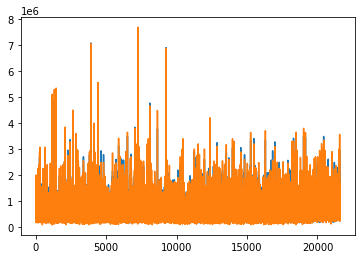

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = y_pred
y = df['price']
ax.plot(x)
ax.plot(y)
plt.show()


In [15]:
print(df[['price','prediction']].corr())

               price  prediction
price       1.000000    0.955203
prediction  0.955203    1.000000
